# Loading Data

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv("ALL_DATA_COMBINED.csv")

In [4]:
df.columns.tolist()

['week_start',
 'digital_catchuptv_bledina_brand-equity_spends',
 'digital_dataretailers_bledina_brand-equity_spends',
 'digital_directbuying_bledina_brand-equity_spends',
 'digital_keywordtargeting_bledina_brand-equity_spends',
 'digital_nativeads_bledina_brand-equity_spends',
 'digital_programmatic_bledina_brand-equity_spends',
 'digital_sea_bledina_brand-equity_spends',
 'digital_social_bledina_brand-equity_spends',
 'press_equity_bledina_brand-equity_spends',
 'tv_equity_bledina_brand-equity_spends',
 'digital_dataretailers_bledina_brand-range_spends',
 'digital_directbuying_bledina_brand-range_spends',
 'digital_keywordtargeting_bledina_brand-range_spends',
 'digital_programmatic_bledina_brand-range_spends',
 'digital_sea_bledina_brand-range_spends',
 'digital_social_bledina_brand-range_spends',
 'press_product_bledina_brand-range_spends',
 'app_total_bledina_brand_visits',
 'crm_automatic_bledina_brand_emails',
 'crm_event_bledina_brand_emails',
 'website_total_bledina_brand_visi

# VIF

In [ ]:
# Create a linear regression model to use for feature selection
lr = LinearRegression()
lr.fit(X_train.y_train)
rfe = RFE(lr,15)
rfe = rfe.fit(X_train.y_train)

# Create a recursive feature elimination object, using 5-fold cross-validation
rfe = RFE(estimator=model, n_features_to_select=15, step=1)

# Fit the RFE object to your log-transformed and outlier-treated dataset
X = df[]
y = df['Sales']
rfe.fit(X, y)

# Get the list of selected features
selected_features = X.columns[rfe.support_]
selected_df = pd.DataFrame({'Selected Features': selected_features})

# Print the dataframe as a table
selected_df

In [5]:
import statsmodels.api as sm

# Get the selected features from the previous step
X_selected = df.drop(['week_start','Sales','retail_total_bledina_product_price','retail_total_bledina_product_volume','digital_sea_bledina_brand-equity_spends','website_total_bledina_brand_visits','macroeconomic_total_total_total_population','macroeconomic_total_total_total_unemploymentrate','macroeconomic_total_total_total_weeklycases','macroeconomic_total_total_total_weeklydeath','retail_total_bledina_product_dvm','competition_retail_competition_nonorganic_dvm','competition_retail_competition_nonorganic_price','digital_dataretailers_bledina_brand-range_spends','macroeconomic_total_total_total_cci','crm_event_bledina_brand_emails','competition_press_competition-others_total_spends','competition_digital_competition-others_total_spends','macroeconomic_total_total_total_lockdownflag','macroeconomic_total_total_total_livebirths','digital_programmatic_bledina_product_spends','app_total_bledina_brand_visits','digital_programmatic_bledina_brand-equity_spends','digital_social_bledina_brand-range_spends','digital_sea_bledina_brand-range_spends','digital_directbuying_bledina_brand-equity_spends','digital_programmatic_bledina_brand-range_spends','crm_automatic_bledina_brand_emails'],axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_selected.columns
vif["VIF Factor"] = [sm.OLS(X_selected[col], X_selected.drop(col, axis=1)).fit().rsquared for col in X_selected.columns]

# Print the VIF for each feature
print(vif)

                                             Features  VIF Factor
0       digital_catchuptv_bledina_brand-equity_spends    0.191138
1   digital_dataretailers_bledina_brand-equity_spends    0.384505
2   digital_keywordtargeting_bledina_brand-equity_...    0.250488
3       digital_nativeads_bledina_brand-equity_spends    0.448875
4          digital_social_bledina_brand-equity_spends    0.461023
5            press_equity_bledina_brand-equity_spends    0.194575
6               tv_equity_bledina_brand-equity_spends    0.460560
7     digital_directbuying_bledina_brand-range_spends    0.078951
8   digital_keywordtargeting_bledina_brand-range_s...    0.192341
9            press_product_bledina_brand-range_spends    0.112699
10  competition_digital_competition-nestle_total_s...    0.550062
11    competition_ooh_competition-nestle_total_spends    0.189325
12    competition_ooh_competition-others_total_spends    0.362873
13  competition_press_competition-nestle_total_spends    0.185635
14     com

In [6]:
import statsmodels.api as sm

# Get the selected features from the previous step
X_selected = df.drop(['week_start','Sales','retail_total_bledina_product_price','retail_total_bledina_product_volume','digital_sea_bledina_brand-equity_spends','website_total_bledina_brand_visits','macroeconomic_total_total_total_population','macroeconomic_total_total_total_unemploymentrate','macroeconomic_total_total_total_weeklycases','macroeconomic_total_total_total_weeklydeath','retail_total_bledina_product_dvm','competition_retail_competition_nonorganic_dvm','competition_retail_competition_nonorganic_price','digital_dataretailers_bledina_brand-range_spends','macroeconomic_total_total_total_cci','crm_event_bledina_brand_emails','competition_press_competition-others_total_spends','competition_digital_competition-others_total_spends','macroeconomic_total_total_total_lockdownflag','macroeconomic_total_total_total_livebirths','digital_programmatic_bledina_product_spends','app_total_bledina_brand_visits','digital_programmatic_bledina_brand-equity_spends','digital_social_bledina_brand-range_spends','digital_sea_bledina_brand-range_spends','digital_directbuying_bledina_brand-equity_spends','digital_programmatic_bledina_brand-range_spends','crm_automatic_bledina_brand_emails'],axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_selected.columns
vif["VIF Factor"] = [sm.OLS(X_selected[col], X_selected.drop(col, axis=1)).fit().rsquared for col in X_selected.columns]

# Print the VIF for each feature
print(vif)

                                             Features  VIF Factor
0       digital_catchuptv_bledina_brand-equity_spends    0.191138
1   digital_dataretailers_bledina_brand-equity_spends    0.384505
2   digital_keywordtargeting_bledina_brand-equity_...    0.250488
3       digital_nativeads_bledina_brand-equity_spends    0.448875
4          digital_social_bledina_brand-equity_spends    0.461023
5            press_equity_bledina_brand-equity_spends    0.194575
6               tv_equity_bledina_brand-equity_spends    0.460560
7     digital_directbuying_bledina_brand-range_spends    0.078951
8   digital_keywordtargeting_bledina_brand-range_s...    0.192341
9            press_product_bledina_brand-range_spends    0.112699
10  competition_digital_competition-nestle_total_s...    0.550062
11    competition_ooh_competition-nestle_total_spends    0.189325
12    competition_ooh_competition-others_total_spends    0.362873
13  competition_press_competition-nestle_total_spends    0.185635
14     com

In [7]:
vif_features = vif["Features"].tolist()

In [8]:
win_df = df[vif_features]

In [9]:
win_df

,digital_catchuptv_bledina_brand-equity_spends,digital_dataretailers_bledina_brand-equity_spends,digital_keywordtargeting_bledina_brand-equity_spends,digital_nativeads_bledina_brand-equity_spends,digital_social_bledina_brand-equity_spends,press_equity_bledina_brand-equity_spends,tv_equity_bledina_brand-equity_spends,digital_directbuying_bledina_brand-range_spends,digital_keywordtargeting_bledina_brand-range_spends,press_product_bledina_brand-range_spends,...,competition_tv_competition-nestle_total_spends,competition_tv_competition-others_total_spends,macroeconomic_total_total_total_holiday,digital_catchuptv_bledina_product_spends,digital_dataretailers_bledina_product_spends,digital_keywordtargeting_bledina_product_spends,digital_social_bledina_product_spends,press_product_bledina_product_spends,tv_product_bledina_product_spends,promo_total_bledina_bledina_spends
0,0.01,0.0,0.000000,2367.40,0.010000,0.0,2369.390000,0.0,0.000000,0,...,354064.5161,447096.77420,0,0.0,0.000,0.0,0.0,0.0,0.0,7238.542484
1,0.00,0.0,0.000000,2785.65,10034.990000,0.0,2470.600000,0.0,0.000000,0,...,354064.5161,447096.77420,0,0.0,0.000,0.0,0.0,0.0,0.0,20498.188230
2,0.00,0.0,0.000000,2708.31,6955.560000,0.0,2470.600000,0.0,0.000000,0,...,354064.5161,447096.77420,0,0.0,0.000,0.0,0.0,0.0,0.0,104070.912100
3,0.00,0.0,0.000000,2473.94,4630.010000,0.0,2470.600000,0.0,0.000000,0,...,354064.5161,447096.77420,0,0.0,0.000,0.0,0.0,0.0,0.0,67294.616930
4,0.00,0.0,0.000000,618.99,2911.880000,0.0,2463.250000,0.0,0.000000,0,...,381161.2903,274527.64980,0,0.0,0.000,0.0,0.0,0.0,0.0,46532.729780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.00,0.0,6562.143500,0.00,8923.720012,0.0,2777.054278,0.0,5513.550497,0,...,432193.5484,22129.03226,0,0.0,0.000,0.0,0.0,0.0,0.0,23682.980950
178,0.00,0.0,0.031994,0.00,1075.980003,0.0,2347.751201,0.0,4681.485249,0,...,0.0000,257600.00000,1,0.0,0.000,0.0,0.0,0.0,0.0,15803.450730
179,0.00,0.0,0.000000,0.00,3742.977999,0.0,3132.570888,0.0,4148.221368,0,...,0.0000,257600.00000,0,0.0,0.000,0.0,0.0,0.0,0.0,2392.235897
180,0.00,0.0,0.000000,0.00,4007.615998,0.0,3132.570888,0.0,3691.624404,0,...,0.0000,257600.00000,0,0.0,380.505,0.0,0.0,0.0,0.0,13390.429120


# Outliers Before

In [10]:
Q1 = win_df.quantile(0.25)
Q3 = win_df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((win_df < (Q1 - 1.5 * IQR)) | (win_df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers: ", outliers.sum())

Number of outliers:  529


# Outlier Treatment

In [11]:
# Set the percentile values for Winsorization
lower_percentile = 5
upper_percentile = 95

# Calculate the percentile values for each column
lower_limits = win_df.quantile(lower_percentile/100)
upper_limits = win_df.quantile(upper_percentile/100)

# Calculate the highest non-outlier value for each column
highest_non_outliers = win_df.apply(lambda x: x[x <= upper_limits[x.name]].max())

# Replace the outliers with the highest non-outlier values
for col in win_df.columns:
    if win_df[col].dtype == 'float64' or win_df[col].dtype == 'int64' :
        win_df[col] = np.where(win_df[col] > upper_limits[col], highest_non_outliers[col], win_df[col])

C:\Users\AniruddhaMistry\AppData\Local\Temp\ipykernel_22256\4210883569.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_df[col] = np.where(win_df[col] > upper_limits[col], highest_non_outliers[col], win_df[col])


# Outliers After

In [12]:
Q1 = win_df.quantile(0.25)
Q3 = win_df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((win_df < (Q1 - 1.5 * IQR)) | (win_df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers: ", outliers.sum())

Number of outliers:  507


# Log 

In [13]:
win_df = win_df + 0.1

In [14]:
log_trans_df = np.log(win_df)

In [29]:
# Create a linear regression model to use for feature selection
model = LinearRegression()

# Create a recursive feature elimination object, using 5-fold cross-validation
rfe = RFE(estimator=model, n_features_to_select=15, step=1)

# Fit the RFE object to your log-transformed and outlier-treated dataset
X = df.drop(['week_start','Sales'])
y = df['Sales']
rfe.fit(X, y)

# Get the list of selected features
selected_features = X.columns[rfe.support_]
selected_df = pd.DataFrame({'Selected Features': selected_features})

# Print the dataframe as a table
selected_df

KeyError: "['week_start', 'Sales'] not found in axis"

# Declare X & y

In [16]:
X = log_trans_df
y = df['Sales']

# Fitting X & y in model

In [17]:
model = smf.ols('y~X', data=log_trans_df).fit()
# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.290
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           9.98e-06
Time:                        11:33:19   Log-Likelihood:                -2613.3
No. Observations:                 182   AIC:                             5271.
Df Residuals:                     160   BIC:                             5341.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.204e+05   2.75e+04     11.639      0.0

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [20]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [21]:
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))

0.2525095126620598
0.43016857275639797


In [22]:
for i in range(1,24):
    # Create a linear regression model to use for feature selection
    model = LinearRegression()

    # Create a recursive feature elimination object, using 5-fold cross-validation
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)

    # Fit the RFE object to your log-transformed and outlier-treated dataset
    X = log_trans_df
    y = df['Sales']
    rfe.fit(X, y)

    # Get the list of selected features
    selected_features = X.columns[rfe.support_]

In [23]:
df.shape

(182, 52)

In [24]:
df.corr()

,digital_catchuptv_bledina_brand-equity_spends,digital_dataretailers_bledina_brand-equity_spends,digital_directbuying_bledina_brand-equity_spends,digital_keywordtargeting_bledina_brand-equity_spends,digital_nativeads_bledina_brand-equity_spends,digital_programmatic_bledina_brand-equity_spends,digital_sea_bledina_brand-equity_spends,digital_social_bledina_brand-equity_spends,press_equity_bledina_brand-equity_spends,tv_equity_bledina_brand-equity_spends,...,digital_social_bledina_product_spends,press_product_bledina_product_spends,tv_product_bledina_product_spends,promo_total_bledina_bledina_spends,retail_total_bledina_product_volume,retail_total_bledina_product_dvm,retail_total_bledina_product_price,competition_retail_competition_nonorganic_dvm,competition_retail_competition_nonorganic_price,Sales
digital_catchuptv_bledina_brand-equity_spends,1.000000,-0.051129,0.120341,-0.032740,-0.043821,0.572443,-0.030308,0.002661,-0.006723,0.086451,...,-0.059753,-0.025291,-0.082731,-0.001903,-0.022352,-0.004830,-0.144914,-0.110093,-0.027616,-0.056625
digital_dataretailers_bledina_brand-equity_spends,-0.051129,1.000000,0.027641,-0.022308,0.525102,-0.093971,0.056480,0.076942,0.086936,0.089180,...,-0.038164,-0.020074,0.054088,-0.125046,0.050042,0.259645,-0.038343,0.060854,0.018789,0.049807
digital_directbuying_bledina_brand-equity_spends,0.120341,0.027641,1.000000,-0.046925,0.194924,0.176322,0.035690,-0.132534,0.187570,0.346899,...,-0.085751,0.028231,0.008251,0.091584,0.148620,0.391900,-0.328108,-0.128697,-0.052236,0.091762
digital_keywordtargeting_bledina_brand-equity_spends,-0.032740,-0.022308,-0.046925,1.000000,-0.046368,0.011488,-0.071040,0.111055,-0.028275,-0.049107,...,-0.048154,-0.012339,-0.036417,0.022300,-0.106113,-0.171862,0.073766,0.137432,-0.025288,-0.102786
digital_nativeads_bledina_brand-equity_spends,-0.043821,0.525102,0.194924,-0.046368,1.000000,-0.048260,0.162048,-0.070915,0.138984,0.123241,...,-0.085209,-0.041594,0.205367,-0.022477,0.062028,0.334160,-0.181419,-0.088650,-0.073626,0.031378
digital_programmatic_bledina_brand-equity_spends,0.572443,-0.093971,0.176322,0.011488,-0.048260,1.000000,-0.221427,0.439837,-0.022669,0.064109,...,0.291327,-0.005133,0.052476,-0.055740,-0.051438,0.041240,-0.237535,-0.244588,-0.103111,-0.110333
digital_sea_bledina_brand-equity_spends,-0.030308,0.056480,0.035690,-0.071040,0.162048,-0.221427,1.000000,-0.010152,0.078558,-0.038788,...,-0.041681,-0.093048,0.028792,0.037960,0.097769,0.152730,-0.006443,-0.064301,0.022933,0.106544
digital_social_bledina_brand-equity_spends,0.002661,0.076942,-0.132534,0.111055,-0.070915,0.439837,-0.010152,1.000000,-0.130076,-0.063404,...,0.380970,-0.056762,-0.167510,-0.098803,-0.119743,-0.145066,0.020081,-0.103351,0.008367,-0.128834
press_equity_bledina_brand-equity_spends,-0.006723,0.086936,0.187570,-0.028275,0.138984,-0.022669,0.078558,-0.130076,1.000000,0.106876,...,-0.023061,-0.025445,0.166626,0.189663,0.268034,0.291813,-0.275452,-0.026968,-0.035139,0.233735
tv_equity_bledina_brand-equity_spends,0.086451,0.089180,0.346899,-0.049107,0.123241,0.064109,-0.038788,-0.063404,0.106876,1.000000,...,0.073467,-0.043833,-0.131927,-0.045499,0.096313,0.308051,-0.246179,-0.077863,-0.089738,0.052861


In [25]:
import seaborn as sns

<AxesSubplot:>

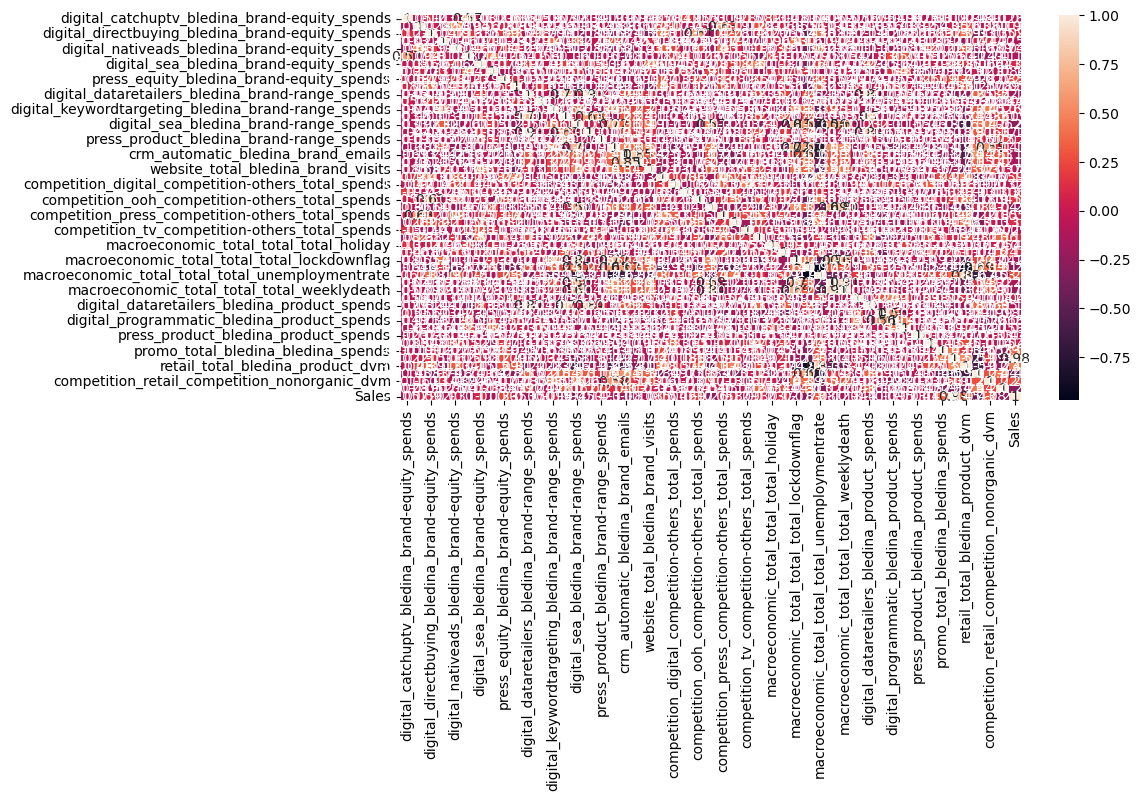

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [27]:
df

,week_start,digital_catchuptv_bledina_brand-equity_spends,digital_dataretailers_bledina_brand-equity_spends,digital_directbuying_bledina_brand-equity_spends,digital_keywordtargeting_bledina_brand-equity_spends,digital_nativeads_bledina_brand-equity_spends,digital_programmatic_bledina_brand-equity_spends,digital_sea_bledina_brand-equity_spends,digital_social_bledina_brand-equity_spends,press_equity_bledina_brand-equity_spends,...,digital_social_bledina_product_spends,press_product_bledina_product_spends,tv_product_bledina_product_spends,promo_total_bledina_bledina_spends,retail_total_bledina_product_volume,retail_total_bledina_product_dvm,retail_total_bledina_product_price,competition_retail_competition_nonorganic_dvm,competition_retail_competition_nonorganic_price,Sales
0,02-01-2017,0.01,0.0,0.01,0.000000,2367.40,0.060000,16089.49,0.010000,0.0,...,0.0,0.0,0.0,7238.542484,1.159064e+06,67.142970,5.941145,49.752306,4.615065,6886165.0
1,09-01-2017,0.00,0.0,0.01,0.000000,2785.65,0.050000,11618.44,10034.990000,0.0,...,0.0,0.0,0.0,20498.188230,9.700224e+05,63.112123,6.057041,45.138664,4.613792,5875465.0
2,16-01-2017,0.00,0.0,0.01,0.000000,2708.31,0.080000,10388.53,6955.560000,0.0,...,0.0,0.0,0.0,104070.912100,1.004450e+06,64.281646,5.871734,50.758389,4.523880,5897865.0
3,23-01-2017,0.00,0.0,0.00,0.000000,2473.94,0.080000,9699.73,4630.010000,0.0,...,0.0,0.0,0.0,67294.616930,9.012154e+05,63.696530,6.026822,51.561729,4.645751,5431465.0
4,30-01-2017,0.00,0.0,0.01,0.000000,618.99,0.010000,6182.01,2911.880000,0.0,...,0.0,0.0,0.0,46532.729780,9.233847e+05,64.752914,5.953575,51.450668,4.707299,5497440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,25-05-2020,0.00,0.0,0.00,6562.143500,0.00,5501.142043,2537.86,8923.720012,0.0,...,0.0,0.0,0.0,23682.980950,8.407745e+05,57.179983,6.142551,55.638044,4.851504,5164500.0
178,01-06-2020,0.00,0.0,0.00,0.031994,0.00,0.000000,2739.21,1075.980003,0.0,...,0.0,0.0,0.0,15803.450730,9.105574e+05,58.390835,6.168749,56.404964,4.822768,5617000.0
179,08-06-2020,0.00,0.0,0.00,0.000000,0.00,0.000000,2782.00,3742.977999,0.0,...,0.0,0.0,0.0,2392.235897,8.308963e+05,56.617011,6.238926,54.727325,4.789930,5183900.0
180,15-06-2020,0.00,0.0,0.00,0.000000,0.00,0.000000,2622.45,4007.615998,0.0,...,0.0,0.0,0.0,13390.429120,8.028773e+05,55.464290,6.280910,54.276386,4.835722,5042800.0


In [28]:
X

,digital_catchuptv_bledina_brand-equity_spends,digital_dataretailers_bledina_brand-equity_spends,digital_keywordtargeting_bledina_brand-equity_spends,digital_nativeads_bledina_brand-equity_spends,digital_social_bledina_brand-equity_spends,press_equity_bledina_brand-equity_spends,tv_equity_bledina_brand-equity_spends,digital_directbuying_bledina_brand-range_spends,digital_keywordtargeting_bledina_brand-range_spends,press_product_bledina_brand-range_spends,...,competition_tv_competition-nestle_total_spends,competition_tv_competition-others_total_spends,macroeconomic_total_total_total_holiday,digital_catchuptv_bledina_product_spends,digital_dataretailers_bledina_product_spends,digital_keywordtargeting_bledina_product_spends,digital_social_bledina_product_spends,press_product_bledina_product_spends,tv_product_bledina_product_spends,promo_total_bledina_bledina_spends
0,-2.207275,-2.302585,-2.302585,7.769590,-2.207275,-2.302585,7.770430,-2.302585,-2.302585,-2.302585,...,12.777235,13.010531,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,8.887189
1,-2.302585,-2.302585,-2.302585,7.932272,9.213843,-2.302585,7.812257,-2.302585,-2.302585,-2.302585,...,12.777235,13.010531,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,9.928097
2,-2.302585,-2.302585,-2.302585,7.904117,8.847311,-2.302585,7.812257,-2.302585,-2.302585,-2.302585,...,12.777235,13.010531,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,11.387480
3,-2.302585,-2.302585,-2.302585,7.813608,8.440336,-2.302585,7.812257,-2.302585,-2.302585,-2.302585,...,12.777235,13.010531,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,11.116837
4,-2.302585,-2.302585,-2.302585,6.428251,7.976589,-2.302585,7.809277,-2.302585,-2.302585,-2.302585,...,12.850978,12.522808,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,10.747913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-2.302585,-2.302585,-2.302585,-2.302585,9.096479,-2.302585,7.929182,-2.302585,8.065458,-2.302585,...,12.976629,10.004650,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,10.072516
178,-2.302585,-2.302585,-2.302585,-2.302585,6.981080,-2.302585,7.761256,-2.302585,8.065458,-2.302585,...,-2.302585,12.459164,0.095310,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,9.667990
179,-2.302585,-2.302585,-2.302585,-2.302585,8.227664,-2.302585,8.049641,-2.302585,8.065458,-2.302585,...,-2.302585,12.459164,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,7.780026
180,-2.302585,-2.302585,-2.302585,-2.302585,8.295977,-2.302585,8.049641,-2.302585,8.065458,-2.302585,...,-2.302585,12.459164,-2.302585,-2.302585,5.941762,-2.302585,-2.302585,-2.302585,-2.302585,9.502303
